# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import stats
from scipy.stats import linregress

from pprint import pprint
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [46]:
# TESTING OVER HERE, DELETE LATER

##convert TO CELSIUS

url = "http://api.openweathermap.org/data/2.5/weather"

cit = 'nemuro'
unit = 'metric' 

city_url = f'{url}&appid={weather_api_key}?q={cit}&units={unit}'

new =f'{url}?q={cit}&appid={weather_api_key}&units={unit}'
city_weather = requests.get(new).json()

city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp =city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['weather'][0]['description']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']

print(city_lat)
print(city_lng)
print(city_max_temp)
print(city_humidity)
print(city_clouds)
print(city_wind)
print(city_country)
print(city_date)

print(json.dumps(city_weather,indent=4,sort_keys=True))

43.3236
145.575
13.94
95
light rain
3.32
JP
1697741130
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 43.3236,
        "lon": 145.575
    },
    "dt": 1697741130,
    "id": 2128975,
    "main": {
        "feels_like": 13.87,
        "grnd_level": 1007,
        "humidity": 95,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 13.94,
        "temp_max": 13.94,
        "temp_min": 13.94
    },
    "name": "Nemuro",
    "rain": {
        "1h": 0.21
    },
    "sys": {
        "country": "JP",
        "sunrise": 1697747782,
        "sunset": 1697786914
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 240,
        "gust": 4.97,
        "speed": 3.32
    }
}


In [31]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
weather_api_key = "87b82ac74a0d881bca35f1c30d74d4fd"

# Convert Kelvin standard to Celsius
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units={unit}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities

    city_weather = requests.get(city_url).json()
    
    try:    
        # Parse the JSON and retrieve data
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['weather'][0]['description']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | minas de marcona
Processing Record 5 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | colonia
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | balangir
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | lata
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | ternate
Processing Record 21 of Set 1 | arraial do 

In [32]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [33]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carnarvon,-24.8667,113.6333,21.52,62,clear sky,8.90,AU,1697741107
1,hamilton,39.1834,-84.5333,17.07,77,overcast clouds,4.63,US,1697740934
2,bethel,41.3712,-73.4140,19.00,58,few clouds,3.60,US,1697741107
3,minas de marcona,-15.2119,-75.1103,21.79,56,clear sky,6.10,PE,1697741107
4,blackmans bay,-43.0167,147.3167,9.18,93,overcast clouds,1.20,AU,1697741048


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,21.52,62,clear sky,8.90,AU,1697741107
1,hamilton,39.1834,-84.5333,17.07,77,overcast clouds,4.63,US,1697740934
2,bethel,41.3712,-73.4140,19.00,58,few clouds,3.60,US,1697741107
3,minas de marcona,-15.2119,-75.1103,21.79,56,clear sky,6.10,PE,1697741107
4,blackmans bay,-43.0167,147.3167,9.18,93,overcast clouds,1.20,AU,1697741048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

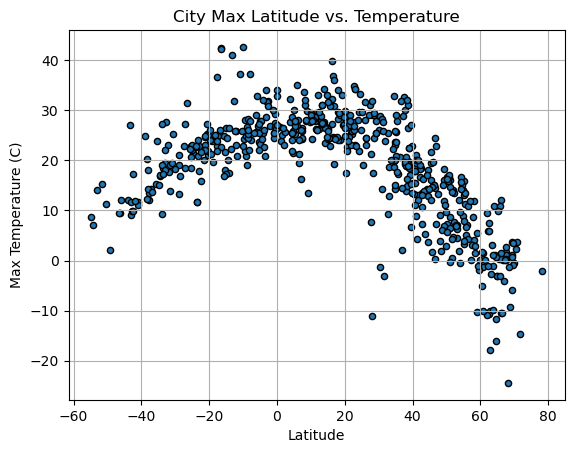

In [42]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind='scatter',edgecolors ='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

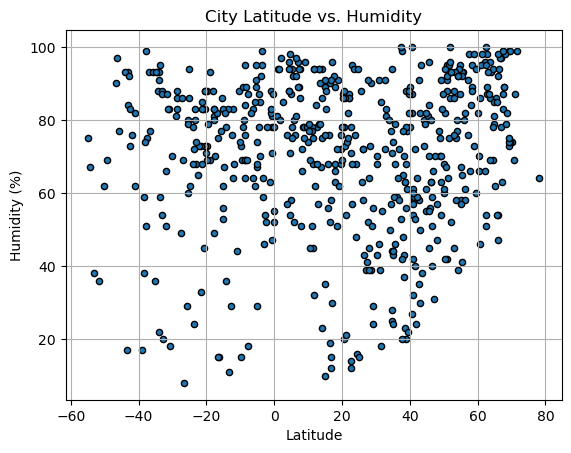

In [44]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat','Humidity',kind='scatter',edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

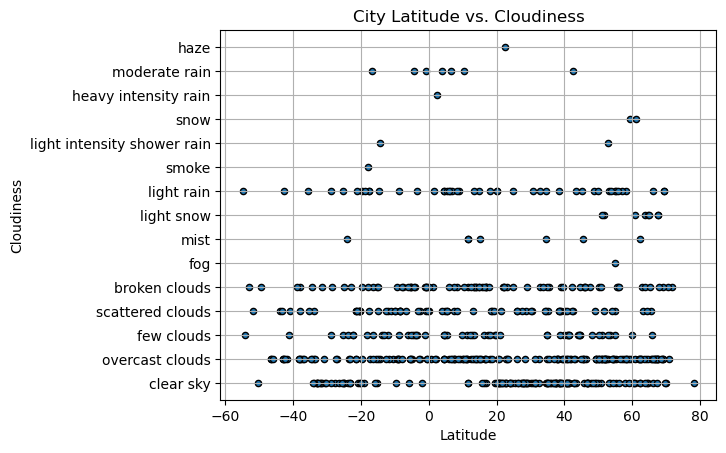

In [45]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat','Cloudiness',kind='scatter',edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

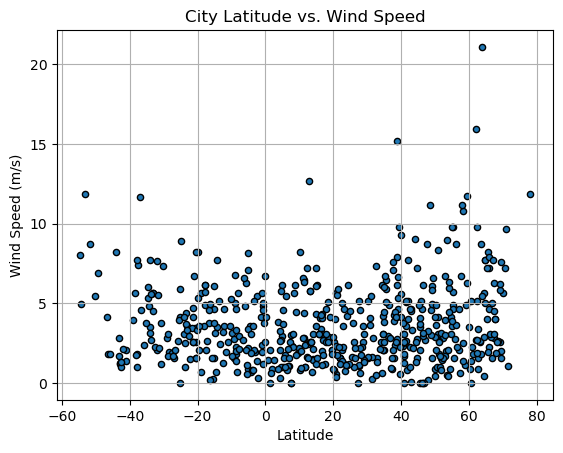

In [48]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat','Wind Speed',kind='scatter',edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values_lat_temp = x_values * slope + intercept
print(regress_values_lat_temp)

City_ID
0      26.251291
1      14.826095
2      14.435837
3      24.529077
4      29.488871
         ...    
566    12.852295
567    23.342268
568    23.010732
569    12.371082
570    24.753638
Name: Lat, Length: 571, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/1326318397.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hamilton,39.1834,-84.5333,17.07,77,overcast clouds,4.63,US,1697740934
2,bethel,41.3712,-73.4140,19.00,58,few clouds,3.60,US,1697741107
9,tiksi,71.6872,128.8694,-14.64,99,broken clouds,1.05,RU,1697740935
10,stanley,54.8680,-1.6985,14.04,95,fog,4.12,GB,1697741049
11,colonia,50.9333,6.9500,16.01,91,clear sky,3.09,DE,1697741108


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<=0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carnarvon,-24.8667,113.6333,21.52,62,clear sky,8.90,AU,1697741107
3,minas de marcona,-15.2119,-75.1103,21.79,56,clear sky,6.10,PE,1697741107
4,blackmans bay,-43.0167,147.3167,9.18,93,overcast clouds,1.20,AU,1697741048
5,puerto natales,-51.7236,-72.4875,15.25,36,scattered clouds,8.75,CL,1697741107
6,margaret river,-33.9500,115.0667,9.26,91,overcast clouds,3.50,AU,1697741107


###  Temperature vs. Latitude Linear Regression Plot

In [55]:
# Linear regression on Northern Hemisphere

x_values_north = northern_hemi_df['Lat']
y_values_north = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)

# Get regression values
regress_values_northern = x_values_north * slope + intercept
print(regress_values_northern)

City_ID
1      15.378628
2      14.291055
9      -0.779271
10      7.581688
11      9.537659
         ...    
559    17.389132
563    21.749912
565    32.197233
566     9.878029
569     8.536980
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/50233783.py:6: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north, y_values_north)


In [56]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df['Lat']
y_values_south = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)

# Get regression values
regress_values_southern = x_values_south * slope + intercept
print(regress_values_southern)

City_ID
0      20.959667
3      24.388837
4      14.513190
5      11.420692
6      17.733480
         ...    
562    18.627356
564    19.072110
567    26.751942
568    27.412075
570    23.941704
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/340845053.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south, y_values_south)


**Discussion about the linear relationship:** okaayy lets discuss

### Humidity vs. Latitude Linear Regression Plot

In [57]:
# Northern Hemisphere
x_values_north_hum = northern_hemi_df['Lat']
y_values_north_hum = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_hum, y_values_north_hum)

# Get regression values
regress_values_northern_hum = x_values_north_hum * slope + intercept
print(regress_values_northern_hum)

City_ID
1      70.841717
2      71.096874
9      74.632542
10     72.670967
11     72.212074
         ...    
559    70.370030
563    69.346942
565    66.895883
566    72.132220
569    72.446845
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/306742700.py:6: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_north_hum, y_values_north_hum)


In [58]:
# Southern Hemisphere
x_values_south_hum = southern_hemi_df['Lat']
y_values_south_hum = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_hum, y_values_south_hum)

# Get regression values
regress_values_southern_hum = x_values_south_hum * slope + intercept
print(regress_values_southern_hum)

City_ID
0      69.936224
3      70.327545
4      69.200581
5      68.847679
6      69.568066
         ...    
562    69.670071
564    69.720824
567    70.597212
568    70.672543
570    70.276520
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2958285093.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_south_hum, y_values_south_hum)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [61]:
# Northern Hemisphere
x_north_cloud = northern_hemi_df['Lat']
y_north_cloud = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_cloud, y_north_cloud)

# Get regression values
regress_values_northern_cloud = x_north_cloud * slope + intercept
print(regress_values_northern_cloud)

##HAVE TO FIND NUMERIC VALUES FOR CLOUDINESS


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2372748839.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_cloud, y_north_cloud)


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [60]:
# Southern Hemisphere
x_south_cloud = southern_hemi_df['Lat']
y_south_cloud = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_cloud, y_south_cloud)

# Get regression values
regress_values_southern_cloud = x_south_cloud * slope + intercept
print(regress_values_southern_cloud)

City_ID
0      69.936224
3      70.327545
4      69.200581
5      68.847679
6      69.568066
         ...    
562    69.670071
564    69.720824
567    70.597212
568    70.672543
570    70.276520
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/1676078689.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_cloud, y_south_cloud)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [62]:
# Northern Hemisphere
x_north_wind = northern_hemi_df['Lat']
y_north_wind = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_wind, y_north_wind)

# Get regression values
regress_values_northern_wind = x_north_wind * slope + intercept
print(regress_values_northern_wind)

City_ID
1      3.633696
2      3.708514
9      4.745244
10     4.170070
11     4.035513
         ...   
559    3.495388
563    3.195398
565    2.476697
566    4.012098
569    4.104353
Name: Lat, Length: 396, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2205515631.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_north_wind, y_north_wind)


In [63]:
# Southern Hemisphere
x_south_wind = southern_hemi_df['Lat']
y_south_wind = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_wind, y_south_wind)

# Get regression values
regress_values_southern_wind = x_south_wind * slope + intercept
print(regress_values_southern_wind)

City_ID
0      3.789363
3      3.481676
4      4.367784
5      4.645263
6      4.078838
         ...   
562    3.998634
564    3.958727
567    3.269642
568    3.210411
570    3.521795
Name: Lat, Length: 175, dtype: float64


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_71956/2832556900.py:5: DeprecationWarning: Please use `linregress` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_south_wind, y_south_wind)


**Discussion about the linear relationship:** YOUR RESPONSE HERE